# Exercice 1 : Dataset Generation

<img src = "picture/exo1.png">

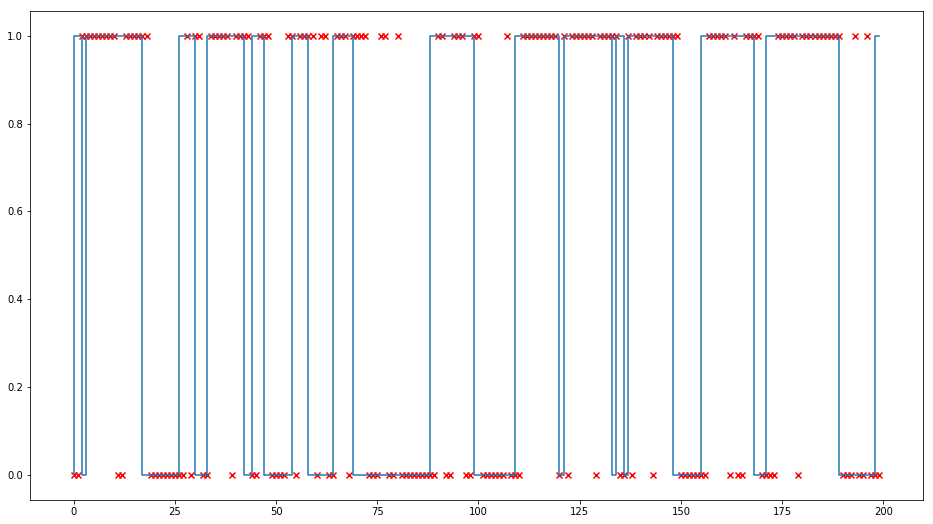

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.figure(figsize=(16,9)) 

iteration = 199
observations = []
states = []

#a is the probability for the observation to change
#b is the probability that the state is the same as the observation
a,b = 0.1, 0.8

#start with a happy state 
#because of np starting generating number with 0 happy and smile = 0 and sad and grimace = 1
initial_state = 0
observations.append(initial_state)
states.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
bayesian_filters = []
for i in range(iteration):
    if states[i] == 0:
        #hidden state probability distribution based on current observation
        observations.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
        #observation distribution based on current state
        states.append(np.random.choice(2,1, p=[0.9, 0.1])[0])
    if states[i] == 1:
        observations.append(np.random.choice(2,1, p=[0.2, 0.8])[0])
        states.append(np.random.choice(2,1, p=[0.1, 0.9])[0])
#plot observations as scatter and state as step
plt.step(np.arange(len(states)), states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')

# Exercice 2 : Viterbi implementation

<img src="picture/exo2.png">

In [8]:
#since there is no built-in Viterbi function in Python, I coded my own version of the algorithmn
def viterbi(observations, p_state, p_observation):
    #state probabilities
    p_same_state = 1 - p_state
    p_different_state = p_state
    #observation probabilities
    p_same_state_observation = p_observation
    p_different_state_observation = 1 - p_observation
    #array of probabilities
    probabilities = []
    #get first state probability based on first observation
    if observations[0] == 0:
        probabilities.append((p_same_state_observation,p_different_state_observation))
    else:
        probabilities.append((p_different_state_observation,p_same_state_observation))
    #loop throught observations
    for i in range(1,len(observations)):
        #get last probability for the 2 possible states
        yesterday_happy, yesterday_sad = probabilities[-1]
        #when current observation is smile
        if observations[i] == 0:
            #get probability for today happy when yesterday was happy OR yesterday was sad
            today_happy = max(yesterday_happy*p_same_state*p_same_state_observation, 
                              yesterday_sad*p_different_state*p_same_state_observation)
            #get probability for today sad when yesterday was happy OR yesterday was sad
            today_sad = max(yesterday_happy*p_different_state_observation*p_different_state,
                            yesterday_sad*p_different_state_observation*p_same_state)
        #when current observation is grimace
        else:
            #get probability for today happy when yesterday was happy OR yesterday was sad
            today_happy = max(yesterday_happy*p_same_state*p_different_state_observation,
                             yesterday_sad*p_different_state*p_different_state_observation)
            #get probability for today sad when yesterday was happy OR yesterday was sad
            today_sad = max(yesterday_happy*p_different_state*p_same_state_observation,
                           yesterday_sad*p_same_state*p_same_state_observation)
        #add the 2 probabilities to array
        probabilities.append((today_happy, today_sad))
    #array of most probable states based on viterbi algorithmn 
    results = []
    #loop throught calculed probabilities
    for p in probabilities:
        #when proba of state happy is greater then proba of state sad
        if p[0] > p[1]:
            #add happy state to results array
            results.append(0)
        #when proba of state sad is greater then proba of state happy
        else:
            #add sad state to results array
            results.append(1)
    return results

## Exercice 2 : Visualisation and accuracy 

<img src="picture/exo3.png">

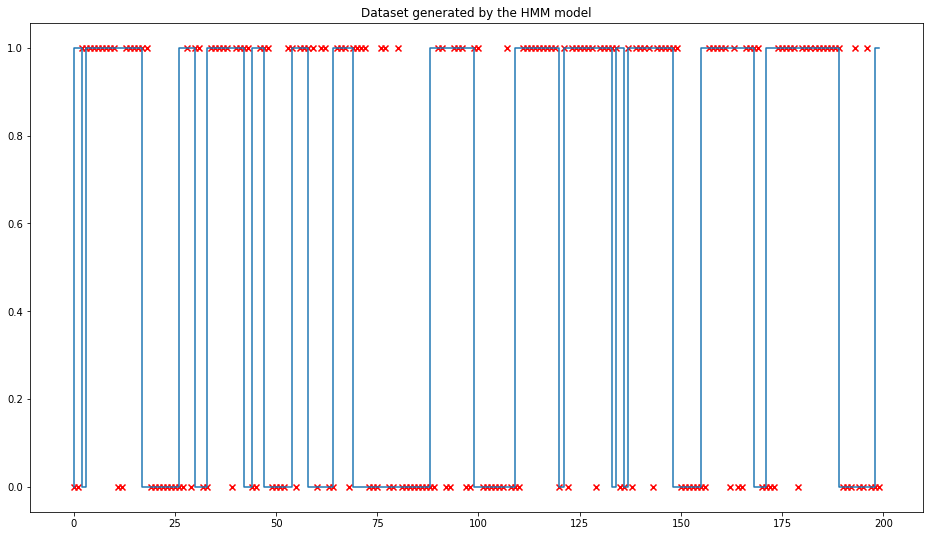

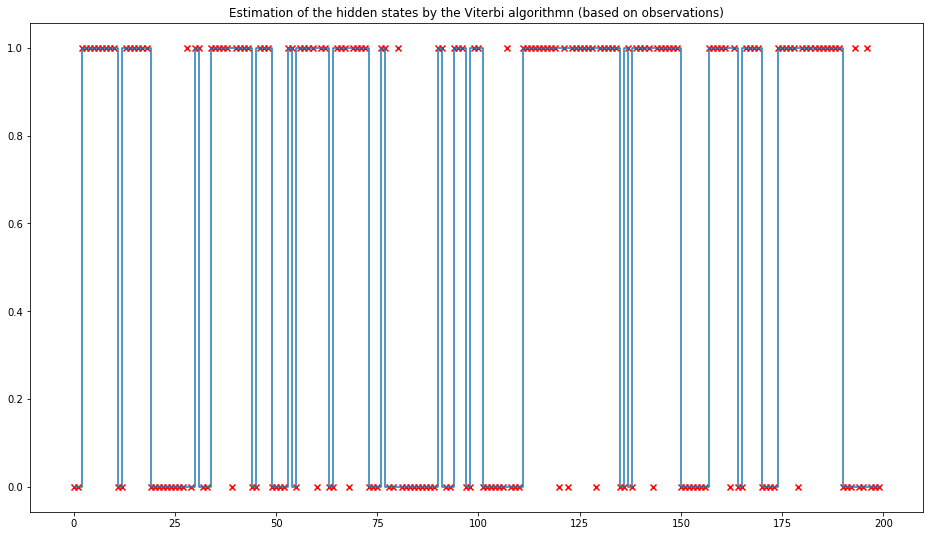

Numbers of errors : 56 out of 200
Accuracy : 72.0 %


In [9]:
#call the Viterbi algorithmn and store hidden state estimates
viterbi_states = viterbi(observations, a, b)
#plot the original hidden state with observations
plt.figure(figsize=(16,9))
plt.step(np.arange(len(states)), states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Dataset generated by the HMM model')
plt.show()
#plot the Viterbi states estimate
plt.figure(figsize=(16,9))
plt.step(np.arange(len(viterbi_states)), viterbi_states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Estimation of the hidden states by the Viterbi algorithmn (based on observations)')
plt.show()
#error calculation
nb_errors = 0
for i in range(len(observations)):
    #whenever a state is not the same as a estimate state
    if viterbi_states[i] != states[i]:
        #we add 1 to the total numbers of errors
        nb_errors = nb_errors + 1
print ("Numbers of errors : "+ str(nb_errors) + " out of " + str(len(observations)))
#we then calculate the mean between the error and the total number of states
print("Accuracy : " + str((len(observations) - nb_errors)/len(observations) * 100) + " %")

# Exercice 3 : Bayesian Filtering

<img src = "picture/exo4.png">

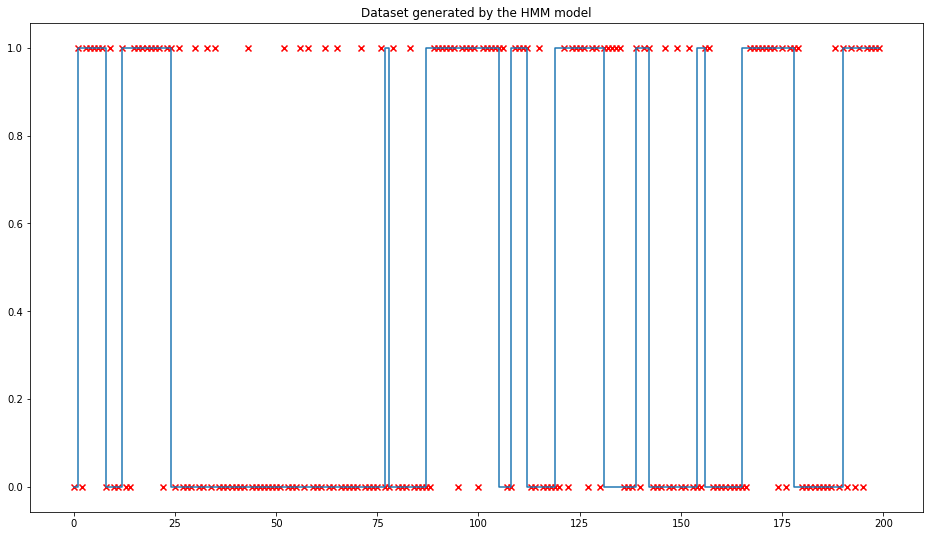

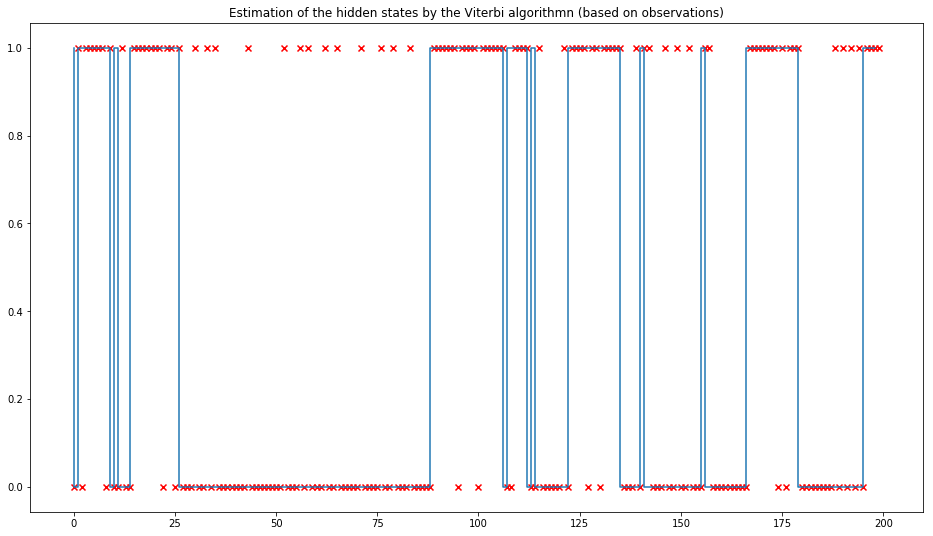

Numbers of errors : 29 out of 200
Accuracy : 85.5 %


In [11]:
iteration = 199
observations = []
states = []

#a is the probability for the observation to change
#b is the probability that the state is the same as the observation
a,b = 0.1, 0.8

#start with a happy state 
#because of np starting generating number with 0 happy and smile = 0 and sad and grimace = 1
initial_state = 0
observations.append(initial_state)
states.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
bayesian_filters = []
for i in range(iteration):
    if states[i] == 0:
        #hidden state probability distribution based on current observation
        observations.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
        #observation distribution based on current state
        states.append(np.random.choice(2,1, p=[0.9, 0.1])[0])
    if states[i] == 1:
        observations.append(np.random.choice(2,1, p=[0.2, 0.8])[0])
        states.append(np.random.choice(2,1, p=[0.1, 0.9])[0])

    viterbi_proba = viterbi(observations,a,b)
    bayesian_filters.append(viterbi_proba[-1])
#plot the original hidden state with observations
plt.figure(figsize=(16,9))
plt.step(np.arange(len(states)), states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Dataset generated by the HMM model')
plt.show()
#plot the Viterbi states estimate
plt.figure(figsize=(16,9))
plt.step(np.arange(len(bayesian_filters)), bayesian_filters)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Estimation of the hidden states by the Viterbi algorithmn (based on observations)')
plt.show()
#error calculation
nb_errors = 0
for i in range(len(observations)-1):
    #whenever a state is not the same as a estimate state
    if bayesian_filters[i] != states[i]:
        #we add 1 to the total numbers of errors
        nb_errors = nb_errors + 1
print ("Numbers of errors : "+ str(nb_errors) + " out of " + str(len(observations)))
#we then calculate the mean between the error and the total number of states
print("Accuracy : " + str((len(observations) - nb_errors)/len(observations) * 100) + " %")

# Exercice 3 : Time efficienty

<img src = "picture/exo5.png">

Iteration n°0 : 0.01430511474609375 ms
Iteration n°50 : 0.05984306335449219 ms
Iteration n°100 : 0.11658668518066406 ms
Iteration n°150 : 0.1995563507080078 ms
Iteration n°200 : 0.1780986785888672 ms
Iteration n°250 : 0.2124309539794922 ms
Iteration n°300 : 0.2491474151611328 ms
Iteration n°350 : 0.3001689910888672 ms
Iteration n°400 : 0.3135204315185547 ms
Iteration n°450 : 0.39196014404296875 ms
Iteration n°500 : 0.39505958557128906 ms
Iteration n°550 : 0.43320655822753906 ms
Iteration n°600 : 0.5762577056884766 ms
Iteration n°650 : 0.5664825439453125 ms
Iteration n°700 : 0.5509853363037109 ms
Iteration n°750 : 0.5881786346435547 ms
Iteration n°800 : 0.6284713745117188 ms
Iteration n°850 : 0.6673336029052734 ms
Iteration n°900 : 0.7064342498779297 ms
Iteration n°950 : 0.8020401000976562 ms


/home/romain/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


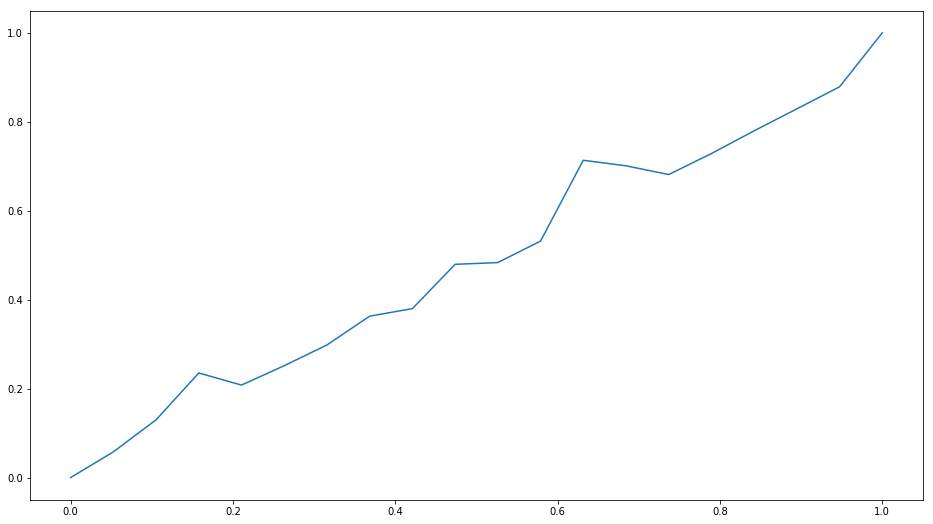

Linear relationship  : Time = dataset.length * 1.0565716470124236 + -0.013975417572856511


In [81]:
import time
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
iteration = 1000
observations = []
states = []

#a is the probability for the observation to change
#b is the probability that the state is the same as the observation
a,b = 0.1, 0.8

#start with a happy state 
#because of np starting generating number with 0 happy and smile = 0 and sad and grimace = 1
initial_state = 0
observations.append(initial_state)
states.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
bayesian_filters = []
time_total = []
for i in range(iteration):
    
    if states[i] == 0:
        #hidden state probability distribution based on current observation
        observations.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
        #observation distribution based on current state
        states.append(np.random.choice(2,1, p=[0.9, 0.1])[0])
    if states[i] == 1:
        observations.append(np.random.choice(2,1, p=[0.2, 0.8])[0])
        states.append(np.random.choice(2,1, p=[0.1, 0.9])[0])
    start = time.time()
    viterbi_proba = viterbi(observations,a,b)
    end = time.time()
    
    if(i%50 == 0):
        time_total.append((end-start))
        print("Iteration n°"+str(i)+" : "+str((end-start)*1000) + " ms")
    bayesian_filters.append(viterbi_proba[-1])

#create dataset so we can use scikit learn built-in function minmaxscaler to scale the data
df_time = pd.DataFrame()
df_time['Time'] = time_total
df_time['Iteration'] = np.arange(len(time_total))
#scale the data 
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_time)
df_normalized = pd.DataFrame(normalized_data)
#plot the time for each iteration 
plt.figure(figsize=(16,9))
plt.plot(df_normalized[1], df_normalized[0])
plt.show()
#compute the linear relationship between dataset size and time taken by the viterbi algorithm
coeff = np.polyfit(x=df_normalized[0], y=df_normalized[1], deg=1)
print("Linear relationship  : Time = dataset.length * " + str(coeff[0]) + " + "+str(coeff[1]))

<p> We can see that the more observations we feed to the viterbi algorithmn, the more time it make to compute the hidden states. The relationship between the dataset size and the time is T = dataset_size * 1 + 0. The problem with that relationship is that it is not scalable for a dataset containing a lot of entries. </p>

# Exercice 3 : Accuracy

<img src = "picture/exo6.png">

In [82]:
nb_errors = 0
for i in range(len(observations)-1):
    #whenever a state is not the same as a estimate state
    if bayesian_filters[i] != states[i]:
        #we add 1 to the total numbers of errors
        nb_errors = nb_errors + 1
#we then calculate the mean between the error and the total number of states
print("Accuracy with Bayesian filtering : " + str((len(observations) - nb_errors)/len(observations) * 100) + " %")
viterbi_proba = viterbi(observations,a,b)
nb_errors = 0
for i in range(len(observations)-1):
    #whenever a state is not the same as a estimate state
    if viterbi_proba[i] != states[i]:
        #we add 1 to the total numbers of errors
        nb_errors = nb_errors + 1
print("Accuracy with Viterbi applied once on the full dataset : " + str((len(observations) - nb_errors)/len(observations) * 100) + " %")


Accuracy with Bayesian filtering : 78.62137862137862 %
Accuracy with Viterbi applied once on the full dataset : 70.92907092907093 %


<p> In my case, the accuracy with the Bayesian filtering is higher than with the Viterbi algorithmn applied once on the full dataset </p>

# Exercice 4 : Particle filters

<img src = "picture/exo7.png">
